# Features consist of hourly average ambient variables for a combine cycle power plant
Input
- Ambient Temperature (AT) 
- Exhaust Vacuum (V) 
- Ambient Pressure (AP) 
- Relative Humidity (RH) 

Output
- Net hourly electrical energy output (PE)

Here we will use XGBoost with linear regression and compare the output with XGBoost (using Decision trees)


In [93]:
#!pip install xgboost             #install this library

import pandas as pd
import numpy as np
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt

In [94]:
df=pd.read_excel('Power_plant.xlsx')

In [95]:
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [96]:
X=df.drop('PE',axis=1)
y=df['PE']

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3) #train test split

In [98]:
xgb = xgboost.XGBRegressor(n_estimators=600, learning_rate=0.10,booster='gblinear') 

#booster is changed from default to 'gblinear'

In [99]:
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gblinear', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=600,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [100]:
predictions = xgb.predict(X_test)

In [101]:
dt_pred = r2_score(y_test, predictions, multioutput='variance_weighted')               
print ('Model score using a single Decision Tree : {}'.format(round(dt_pred,2)))

Model score using a single Decision Tree : 0.42


# Iterating over 5 different values of estimator
  Here Base estimator is Linear regression and not Decision Trees

In [102]:
n_est=[100,200,400,800,1200]

In [103]:
r2_pred=[]
for i in n_est:
    xgb_ne = xgboost.XGBRegressor(n_estimators=i, learning_rate=0.10, booster='gblinear')
    xgb_ne.fit(X_train,y_train)
    prediction_ne=xgb_ne.predict(X_test)
    r2_pred.append(r2_score(y_test, prediction_ne, multioutput='variance_weighted'))
    

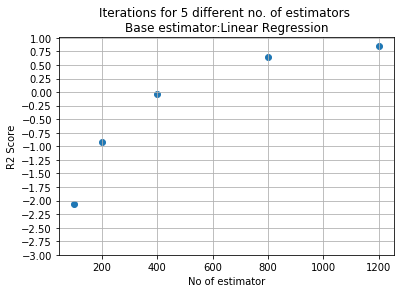

In [104]:
y=r2_pred
x=n_est
plt.scatter(x, y)
plt.yscale('linear')
plt.xlabel('No of estimator')
plt.ylabel('R2 Score')
plt.yticks(np.arange(-3.0, +1.25, 0.25))
plt.title('Iterations for 5 different no. of estimators \nBase estimator:Linear Regression')
plt.grid(True)
plt.show()

# Using xgboost with Decision trees

In [105]:
xgb1 = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.10,booster='gbtree')
#booster used is 'gbtree'(decision tree). It is also the default booster for this.

xgb1.fit(X_train,y_train)
prediction1 = xgb1.predict(X_test)

In [106]:
dt_pred1 = r2_score(y_test, prediction1, multioutput='variance_weighted')               
print ('Model score using a single Decision Tree : {}'.format(round(dt_pred1,2)))

Model score using a single Decision Tree : 0.95


In [107]:
r2_pred_dt=[]
for i in n_est:
    xgb_ne_dt = xgboost.XGBRegressor(n_estimators=i, learning_rate=0.10, booster='gbtree')
    xgb_ne_dt.fit(X_train,y_train)
    prediction_dt=xgb_ne_dt.predict(X_test)
    r2_pred_dt.append(r2_score(y_test, prediction_dt, multioutput='variance_weighted'))

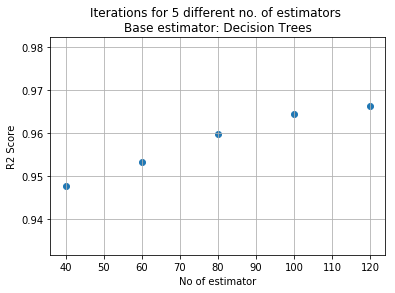

In [108]:
n_est_dt=[40,60,80,100,120]
y=r2_pred_dt
x=n_est_dt
plt.scatter(x, y)
plt.yscale('linear')
plt.xlabel('No of estimator')
plt.ylabel('R2 Score')
plt.title('Iterations for 5 different no. of estimators \nBase estimator: Decision Trees')
plt.grid(True)
plt.show()